# Libraries

In [112]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from transformers import T5Tokenizer
from transformers import AutoTokenizer
from transformers import T5ForConditionalGeneration
from sklearn.model_selection import train_test_split

# Reading Data

In [2]:
df_squad = pd.read_excel('Arabic squad/Arabic-SQuAD.xlsx')
df_arcd = pd.read_excel('ARCD/arcd-train.xlsx')
df_tydiqa = pd.read_csv('tydiqa/tydiqa-arabic.csv')
df_mlqa = pd.read_excel('MLQA/MLQA-dev-context-ar-question-ar.xlsx')

# Data Overview

In [3]:
df_squad.head()

,id,question,context,answers,c_id
0,570bce516b8089140040fa42,ما هو ASCII على أساس؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'الأبجدية الإنجليزية', 'answer_start...",0
1,570bce516b8089140040fa43,كم شخصيات محددة موجودة في كود ASCII؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '128 حرف ا محدد', 'answer_start': 58}]",0
2,570bce516b8089140040fa44,كم عدد أحرف التحكم غير الطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '33 حرف ا تحكم ا غير الطباعة', 'answ...",0
3,570bce516b8089140040fa45,كم شخصيات قابلة للطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '95 حرف ا قابلا للطباعة', 'answer_st...",0
4,570bce516b8089140040fa46,ما هو الفضاء المعروف أيضا باسم ماذا؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'رسم ا غير مرئي 223', 'answer_start'...",0


In [4]:
df_squad.shape

(48344, 5)

In [5]:
df_arcd.head()

,id,question,context,answers,c_id
0,969331847966,- من هو جمال أحمد حمزة خاشقجي؟,جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة...,"[{'text': 'صحفي وإعلامي', 'answer_start': 73}]",0
1,115150665555,- متى ولد جمال أحمد حمزة خاشقجي وتوفي؟ ال,جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة...,[{'text': 'حمزة خاشقجي (13 أكتوبر 1958، المدين...,0
2,74212080718,- في أي مدينة ولد جمال أحمد حمزة خاشقجي؟ ال,جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة...,"[{'text': 'المدينة المنورة', 'answer_start': 39}]",0
3,465699296586,- في أي صحيفة قام بكتابة عمود منذ عام 2017؟ ال,جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة...,"[{'text': 'واشنطن بوست', 'answer_start': 224}]",1
4,564177542570,- كيف وصفها في الصحف ووسائل الإعلام الدولية؟ ال,جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة...,[{'text': 'وُصف في الصحف وأجهزة الاعلام العالم...,1


In [6]:
df_arcd.shape

(693, 5)

In [7]:
df_tydiqa.head()

,id,question,context,answers,c_id
0,arabic-2387335860751143628-1,كم عدد مرات فوز الأوروغواي ببطولة كاس العالم ل...,أقيمت البطولة 21 مرة، شارك في النهائيات 78 دول...,"[{'text': 'بطولتين', 'answer_start': 394}]",0
1,arabic--3358420169913421088-0,من هو مكتشف المرو أو الكوارتز ؟,المرو أو الكوارتز هو معدن يعود اكتشافه إلى ال...,"[{'text': '(بيير كوري) وأخوه (جاك)', 'answer_s...",1
2,arabic-6869798435672288559-0,كيف يتصل الجنين بالرحم ؟,المَشِيمَة أو الخَلاَص أو السُخْد (بالإنجليزي...,"[{'text': 'عن طريق الحبل السري', 'answer_start...",2
3,arabic-1608369850259830544-0,ما هي المَشِيمَة أو الخَلاَص أو السُخْد؟,المَشِيمَة أو الخَلاَص أو السُخْد (بالإنجليزي...,[{'text': 'عضو دائري مسطح الشكل يتصل بالجنين ع...,2
4,arabic--7165672200361826550-0,أين يقع مسجد السلطان عبد المجيد؟,مسجد السلطان عبد المجيد، هو مسجد أثري تاريخي ف...,"[{'text': 'مدينة جبيل اللبنانية', 'answer_star...",3


In [8]:
df_tydiqa.shape

(921, 5)

In [9]:
df_mlqa.head()

,id,question,context,answers,c_id
0,569666f4dc3983dab5624e989212c1d9d0cd1798,هل تزول الإصابة بمرض ذبابة الرمال عبر الوقت؟,تنتقل حمى الفواصد عن طريق لدغات حشرات من جنس ا...,"[{'text': 'وتبقى مصابة بالفيروس مدى حياتها', '...",0
1,561971f7978f678c3d1ba2a946036cdc131c4d49,ما الذي يتكون بالكامل تقريبا من خلايا نسيجية؟,تعد خلايا متن النبات خلايا حية لديها وظائف متن...,"[{'text': 'الأوراق', 'answer_start': 194}]",1
2,60ee75c50c8472be7cce1a24ee2cd7409ee4dd52,ما اسم نوع الخيوط الذي يحتوي على أجزاء من الكرفس؟,خلايا النسيج الغروي - تعيش خلايا النسيج الغروي...,"[{'text': 'النسيج الغروي.', 'answer_start': 11...",2
3,6a636c91f7733165c92ed84864debf6bdbdf7d16,ما هو ناتج تميز الخلايا النباتية؟,تختلف الطبقات الرئيسية من الخلايا عن الخلايا ا...,[{'text': 'هياكل أنسجة الجذور والسيقان والأورا...,3
4,18a5c05701b7359fcd32a379b2ac4a9a5d7544de,أي نوع من النباتات يحتوي على النسيج الوعائي ال...,تكون خلايا النسيج الوعائي الخشبي خلايا مطولةً...,"[{'text': 'تراشيوفيت', 'answer_start': 320}]",4


In [10]:
df_mlqa.shape

(517, 5)

In [11]:
df_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48344 entries, 0 to 48343
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48344 non-null  object
 1   question  48344 non-null  object
 2   context   48344 non-null  object
 3   answers   48344 non-null  object
 4   c_id      48344 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [12]:
df_arcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        693 non-null    int64 
 1   question  693 non-null    object
 2   context   693 non-null    object
 3   answers   693 non-null    object
 4   c_id      693 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 27.2+ KB


In [13]:
df_tydiqa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        921 non-null    object
 1   question  921 non-null    object
 2   context   921 non-null    object
 3   answers   921 non-null    object
 4   c_id      921 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 36.1+ KB


In [14]:
df_mlqa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        517 non-null    object
 1   question  517 non-null    object
 2   context   517 non-null    object
 3   answers   517 non-null    object
 4   c_id      517 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 20.3+ KB


# Removing id column

In [15]:
# TODO: Removing ids column in all datasets

In [16]:
df_squad.drop('id', axis=1, inplace=True)

In [17]:
df_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48344 entries, 0 to 48343
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  48344 non-null  object
 1   context   48344 non-null  object
 2   answers   48344 non-null  object
 3   c_id      48344 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [18]:
df_squad.head(10)

,question,context,answers,c_id
0,ما هو ASCII على أساس؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'الأبجدية الإنجليزية', 'answer_start...",0
1,كم شخصيات محددة موجودة في كود ASCII؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '128 حرف ا محدد', 'answer_start': 58}]",0
2,كم عدد أحرف التحكم غير الطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '33 حرف ا تحكم ا غير الطباعة', 'answ...",0
3,كم شخصيات قابلة للطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '95 حرف ا قابلا للطباعة', 'answer_st...",0
4,ما هو الفضاء المعروف أيضا باسم ماذا؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'رسم ا غير مرئي 223', 'answer_start'...",0
5,لماذا تم ترميز الرمز بحيث تكون معظم الرموز معًا؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': 'لسهولة تحديد الهوية', 'answer_start...",1
6,كم عدد المراكز في العمودين الأولين؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': '32 موضع', 'answer_start': 128}]",1
7,ما الذي قررت اللجنة أنه مهم؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,[{'text': 'دعم الأحرف الهجائية الكبيرة المكونة...,1
8,أين كان الحرف ألف يضع في الموقف؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': '41hex', 'answer_start': 757}]",1
9,تم دمج ASCII في ما مجموعة الأحرف الأخرى؟,تم دمج ASCII في مجموعة أحرف ونيكودي كأول 128 ر...,"[{'text': 'ونيكودي', 'answer_start': 28}]",2


# try1

tried to make something but found out it is the same as the original data

In [19]:
# # Assign a unique question_id to each question
# df_squad['question_id'] = df_squad.index

# # Function to get the context and its associated question_ids
# def get_context_question_ids(df):
#     grouped = df.groupby('c_id').agg(
#         context=('context', 'first'),
#         question_ids=('question_id', list)
#     ).reset_index()
#     return grouped

# # Generate the new DataFrame
# C_Q_df = get_context_question_ids(df_squad)

In [20]:
# C_Q_df.head(15)

In [21]:
# # Create a function to get the assigned questions
# def get_assigned_questions(df, c_id):
#     filtered = df[df['c_id'] == c_id]
#     Q = filtered['question'].tolist()
#     A = filtered['answers'].tolist()
#     return Q, A


In [22]:
# training_data = []

# for _, row in C_Q_df.iterrows():
#     context = row['context']
#     question_ids = row['question_ids']
    
#     # For each question_id in the context, fetch the corresponding question
#     for question_id in question_ids:
#         question = df_squad.loc[df_squad['question_id'] == question_id, 'question'].values[0]
#         training_data.append({
#             'context': context,
#             'question': question,
#             'answers': df_squad.loc[df_squad['question_id'] == question_id, 'answers'].values[0]
#         })
        
# training_df = pd.DataFrame(training_data)

In [23]:
# training_df.head(15)

In [24]:
# TODO: Arrange all data frames by their c_id column, to make same context after each other

In [25]:
# TODO: Combine all datasets as they already contain the same columns (pd.concat([df1, df2], ignore_index=True))

# Text Preprocessing

## text cleaning functions

### Normalization

In [26]:
def remove_diacritics(text):
    # remove diacritics from the text as it may confuse the model
    return re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)


### Text cleaning

In [27]:
def remove_non_arabic(text):
    # Remove non-Arabic characters, keeping essential punctuation
    text = re.sub(r'[^\u0600-\u06FF\s؟]', '', text)
    return text

In [28]:
def remove_punk(text):
    # Remove punctuation
    arabic_punctuation = r'[،؛؟…!"#$%&\'()*+,-./:;<=>@^_`{|}~]'
    text = re.sub(arabic_punctuation, '', text)
    return text

In [29]:
def remove_extra_spaces(text):
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [66]:
def remove_alef_variations(text):
    text = re.sub(r'[إأٱآ]', 'ا', text)
    return text

### Handling numbers

In [33]:
def handle_numbers(text, replace_with=None):
    if replace_with:
        text = re.sub(r'\d+', replace_with, text)
    else:
        text = re.sub(r'\d+', '', text)
    return text

## Stop word removal

In [31]:
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'دواليك', 'ألفى', 'بها', 'كأين', 'ص', 'بئس', 'وَيْ', 'إي', 'ليست', 'كِخ', 'مئتان', 'إذن', 'بما', 'طاء', 'عين', 'هي', 'حمٌ', 'دولار', 'ئ', 'إيهٍ', 'لم', 'كلَّا', 'مع', 'تفعلين', 'إلى', 'طاق', 'إذما', 'خلا', 'نبَّا', 'أهلا', 'مكانكما', 'ظلّ', 'علق', 'عَدَسْ', 'اللاتي', 'هَذِه', 'فيها', 'غادر', 'هاهنا', 'وإذ', 'علًّ', 'لدى', 'هيهات', 'جيم', 'تجاه', 'أين', 'ثامن', 'عما', 'إنما', 'ثلاث', 'أمامك', 'التي', 'تشرين', 'إياهم', 'لستما', 'هَؤلاء', 'يمين', 'جوان', 'فضلا', 'أخٌ', 'ثلاثاء', 'أكثر', 'اللتان', 'ليرة', 'كأيّ', 'أيا', 'آها', 'ثماني', 'إيانا', 'أوّهْ', 'حَذارِ', 'تعلَّم', 'عسى', 'م', 'إلّا', 'إياكن', 'الذين', 'ما برح', 'سبعين', 'هَذَيْنِ', 'إى', 'ثمَّ', 'نفس', 'ين', 'ألا', 'ساء', 'شتان', 'أطعم', 'كي', 'هَذِي', 'أعطى', 'هؤلاء', 'شتانَ', 'سبتمبر', 'سحقا', 'إياها', 'يفعلان', 'صهْ', 'حمدا', 'هكذا', 'عشرون', 'سادس', 'منها', 'لهما', 'ثمانية', 'بعدا', 'أنًّ', 'هَيْهات', 'جلل', 'كأن', 'أُفٍّ', 'كأنما', 'آنفا', 'آهاً', 'أيّان', 'ج', 'ذي', 'لهم', 'وما', 'هَاتانِ', 'بَسْ', 'بؤسا', 'خمسين', 'أن', 'ث

In [32]:
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

## Sentence splitting

In [34]:
def split_sentences(text):
    sentences = re.split(r'[؟.!؟]', text)
    # Remove empty sentences and strip spaces
    return [sentence.strip() for sentence in sentences if sentence.strip()]

## Remove additional spaces between letters

In [106]:
def fix_arabic_spacing(text):
    # Reconnect ا to the previous word if it is fully isolated
    text = re.sub(r'(\S)\s+ا\s+', r'\1ا ', text)
    
    # Reconnect أ and ي to the next word if they are fully isolated
    text = re.sub(r'\s+أ\s+(\S)', r' أ\1', text)
    text = re.sub(r'\s+ي\s+(\S)', r' ي\1', text)
    
    # Normalize spaces (remove extra spaces)
    text = remove_extra_spaces(text)
    
    return text

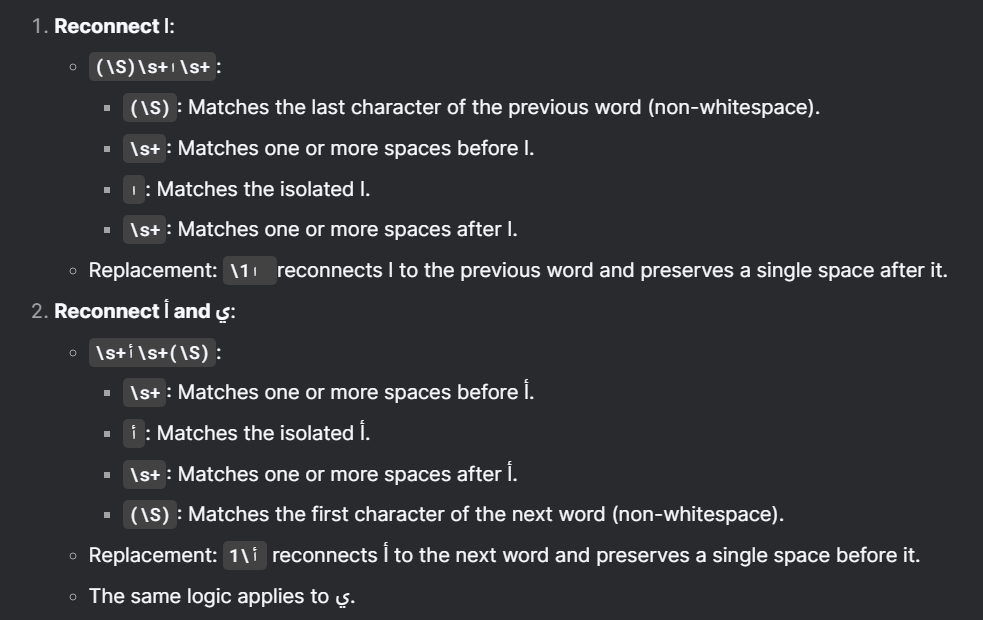

## Tokenization

In [70]:
# Initialize T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

In [91]:
# Example Arabic text
text = "هذا نص تجريبي"

# Tokenize the text
encoded = tokenizer.tokenize(text)
# encoded = tokenizer.convert_tokens_to_string(encoded)
print("text after tokenize: ", encoded)

# Tokenize the text without padding
input_ids = tokenizer.encode(text, max_length=512, truncation=True, padding=False)
print("Token IDs (no padding):", input_ids)

# Decode token IDs back to text (skip special tokens)
decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)
print("Decoded Text:", decoded_text)

text after tokenize:  ['▁', 'هذا', '▁', 'نص', '▁', 'تجريبي']
Token IDs (no padding): [3, 2, 3, 2, 3, 2, 1]
Decoded Text: <unk> <unk> <unk></s>


In [ ]:
arabic_text = "هذا نص تجريبي"
tokens = tokenizer.tokenize(arabic_text)
print("Tokens:", tokens)

# Check if any tokens are unknown
unknown_tokens = [token for token in tokens if tokenizer.convert_tokens_to_ids(token) == 3]
print("Unknown Tokens:", unknown_tokens)

for token in tokens:
    token_id = tokenizer.convert_tokens_to_ids(token)
    print(f"Token: {token}, Token ID: {token_id}")
    
vocab = tokenizer.get_vocab()
print("Vocabulary Size:", len(vocab))

# Check if some Arabic tokens exist in the vocabulary
arabic_tokens = ["ه", "ذا", "نص", "تجريبي"]
for token in arabic_tokens:
    if token in vocab:
        print(f"Token '{token}' found in vocabulary with ID: {vocab[token]}")
    else:
        print(f"Token '{token}' NOT found in vocabulary.")

after trying t5 tokenizer (small), it seems that this model has not trained enough on arabic words, it doesn't recognize it

In [ ]:
from transformers import AutoTokenizer,MT5Tokenizer

# Initialize AraBERT tokenizer
arabert_tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
t5_mutli_tokenizer = MT5Tokenizer.from_pretrained("google/mt5-small")

# Example Arabic text
arabic_text = "هذا نص تجريبي"

# Tokenize the text
araber_tokens = arabert_tokenizer.tokenize(arabic_text)
t5_tokens = t5_mutli_tokenizer.tokenize(arabic_text)
print("Arabic Bert Tokens:", araber_tokens)
print("T5 Tokens:", t5_tokens)

# Encode the text
arabert_input_ids = arabert_tokenizer.encode(arabic_text, max_length=512, truncation=True, padding=False)
t5_input_ids = t5_mutli_tokenizer.encode(arabic_text, max_length=512, truncation=True, padding=False)
print("Arabic Bert Token IDs:", arabert_input_ids)
print("T5 Token IDs:", t5_input_ids)

# Decode token IDs back to text
arabert_decoded_text = arabert_tokenizer.decode(arabert_input_ids, skip_special_tokens=True)
t5_decoded_text = t5_mutli_tokenizer.decode(t5_input_ids, skip_special_tokens=True)
print("Arabic Bert Decoded Text:", arabert_decoded_text)
print("T5 Decoded Text:", t5_decoded_text)

both models seems to be good at tokenizing the arabic, but arabic bert is better at tokenizing the words than T5 as it seems from the output 

In [ ]:
AraBert_tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

In [103]:
def AraBert_tokenizer(text, max_length=512, padding="max_length", truncation=True):
    
    tokenized_output = AraBert_tokenizer(
        text,
        max_length=max_length,
        padding=padding,
        truncation=truncation,
        return_tensors="pt"  # Return PyTorch tensors
    )
    return tokenized_output

## Apply Functions on the text

In [38]:
df_squad.head(10)

,question,context,answers,c_id
0,ما هو ASCII على أساس؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'الأبجدية الإنجليزية', 'answer_start...",0
1,كم شخصيات محددة موجودة في كود ASCII؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '128 حرف ا محدد', 'answer_start': 58}]",0
2,كم عدد أحرف التحكم غير الطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '33 حرف ا تحكم ا غير الطباعة', 'answ...",0
3,كم شخصيات قابلة للطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '95 حرف ا قابلا للطباعة', 'answer_st...",0
4,ما هو الفضاء المعروف أيضا باسم ماذا؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'رسم ا غير مرئي 223', 'answer_start'...",0
5,لماذا تم ترميز الرمز بحيث تكون معظم الرموز معًا؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': 'لسهولة تحديد الهوية', 'answer_start...",1
6,كم عدد المراكز في العمودين الأولين؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': '32 موضع', 'answer_start': 128}]",1
7,ما الذي قررت اللجنة أنه مهم؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,[{'text': 'دعم الأحرف الهجائية الكبيرة المكونة...,1
8,أين كان الحرف ألف يضع في الموقف؟,تم تزيين الرمز نفسه بحيث تكون معظم رموز التحكم...,"[{'text': '41hex', 'answer_start': 757}]",1
9,تم دمج ASCII في ما مجموعة الأحرف الأخرى؟,تم دمج ASCII في مجموعة أحرف ونيكودي كأول 128 ر...,"[{'text': 'ونيكودي', 'answer_start': 28}]",2


In [39]:
# TODO: 2 approaches to be taken on the datasets:
#              1- apply the fixme changes to squad data
#              2- try the nlp preprocessing techniques to the other datasets (arcd, tydiqa, mlqa) and see if there any problems in them

### Questions column

In [109]:
df_squad['processed_question'] = df_squad['question'].apply(remove_diacritics).apply(fix_arabic_spacing).apply(remove_extra_spaces).apply(remove_punk).apply(remove_alef_variations)

* i tried to apply text clean function but i think it made some question not understandable

In [110]:
df_squad['processed_question'].head(10)

0                              ما هو ASCII على اساس
1               كم شخصيات محددة موجودة في كود ASCII
2                    كم عدد احرف التحكم غير الطباعة
3                           كم شخصيات قابلة للطباعة
4               ما هو الفضاء المعروف ايضا باسم ماذا
5    لماذا تم ترميز الرمز بحيث تكون معظم الرموز معا
6                كم عدد المراكز في العمودين الاولين
7                       ما الذي قررت اللجنة انه مهم
8                   اين كان الحرف الف يضع في الموقف
9           تم دمج ASCII في ما مجموعة الاحرف الاخرى
Name: processed_question, dtype: object

In [105]:
## to check if there ? in every question or not
# list = []
# for i in range(len(df_squad['question'])):
#     c = df_squad['question'][i].count('؟')
#     list.append(c)
#     # print(df_squad['question'][0])
# list

### Context column

In [40]:
# TODO: First see what preprocessing techniques we will use for the text for questions, contexts, answers(only text cleaning(i think))

# FIXME: Squad data is cleaned from the diacritics and been replaced with space, how to fix:
#           1- combine every ا to its previous word as the original word but some words may corrupt
#           2- combine every ى and أ with next word when coming in first
#           3- remove every alone character but this also maya corrupt some words as some words splitted from the diacritics (except for ب, ك and و)
# Fixed 

In [47]:
# remove the extra spacing between letters problem
df_squad['processed_context'] = df_squad['context'].apply(fix_arabic_spacing)

In [63]:
# remove extra spaces between words
df_squad['processed_context'] = df_squad['processed_context'].apply(remove_extra_spaces)

In [ ]:
# remove punctuation from words
df_squad['processed_context'] = df_squad['processed_context'].apply(remove_punk)

['خلق الغموض المتأصل للعديد من أحرف التحكم  جنبا إلى جنب مع استخدامها التاريخي  مشاكل عند نقل الملفات النص العادي بين الأنظمة  وأفضل مثال على ذلك هو مشكلة الخط الجديد في أنظمة التشغيل المختلفة  تطلبت أجهزة تيليتيبي إنهاء سطر النص بكل من كاررياغي ريتورن الذي يحرك رأس الطباعة إلى بداية السطر و ليني فيد الذي يعمل على دفع خط الورق بدون تحريك رأس الطباعة  يأتي اسم كاررياغي ريتورن من حقيقة أن الآلة الكاتبة التي تحمل الورقة قد تحركت على آلة كاتبة يدوية  في حين بقي الوضع الذي ضربت فيه الشظايا الشريطية ثابتا  اضطرت إلى دفع كامل العربة أرجعت إلى اليمين لوضع الهامش الأيسر للورقة للسطر التالي ',
 'خلق الغموض المتأصل للعديد من أحرف التحكم  جنبا إلى جنب مع استخدامها التاريخي  مشاكل عند نقل الملفات النص العادي بين الأنظمة  وأفضل مثال على ذلك هو مشكلة الخط الجديد في أنظمة التشغيل المختلفة  تطلبت أجهزة تيليتيبي إنهاء سطر النص بكل من كاررياغي ريتورن الذي يحرك رأس الطباعة إلى بداية السطر و ليني فيد الذي يعمل على دفع خط الورق بدون تحريك رأس الطباعة  يأتي اسم كاررياغي ريتورن من حقيقة أن الآلة الكاتبة التي 

In [67]:
# remove Alef variation from contexts
df_squad['processed_context'] = df_squad['processed_context'].apply(remove_alef_variations)

In [64]:
df_squad['processed_context'][df_squad['c_id'] == 543].tolist()[0]

'ولأنه كان من أتباع القضية المطلقة فقد لعب إليو دورا مهما في قمع مؤيدي دستور عام 1812 ولهذا السبب ق بض عليه في عام 1820 وتم إعدامه في عام 1822 من قبل جاروت استمر الصراع بين الحكم المطلق والليبراليين وفي فترة الحكم المحافظ الذي أطلق عليه العقد الشنيع 1823 1833 والذي أعقب ترينيو ليبرالي كان هناك قمع لا يرحم من قبل القوات الحكومية ومحاكم التفتيش الكاثوليكية آخر ضحية لمحاكمة التفتيش كان غيتا ريبولي وهو مدرس متهم بكونه ربوبيا وماسون تم شنقه في فالنسيا عام 1824'

In [47]:
unique_contexts_df = pd.DataFrame(df_squad['context'].unique().tolist(), columns=["unique context"])
unique_contexts_df.to_csv("unique_context.csv", index=False, header=True)

### Answers column

In [111]:
df_squad['processed_answers'] = df_squad['answers'].apply(remove_diacritics).apply(fix_arabic_spacing).apply(remove_extra_spaces).apply(remove_punk).apply(remove_alef_variations)

In [114]:
df_squad.head()

,question,context,answers,c_id,processed_context,processed_question,processed_answers
0,ما هو ASCII على أساس؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'الأبجدية الإنجليزية', 'answer_start...",0,يعتمد ASCII اساسا على الابجدية الانجليزية ويقو...,ما هو ASCII على اساس,[text الابجدية الانجليزية answerstart 23]
1,كم شخصيات محددة موجودة في كود ASCII؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '128 حرف ا محدد', 'answer_start': 58}]",0,يعتمد ASCII اساسا على الابجدية الانجليزية ويقو...,كم شخصيات محددة موجودة في كود ASCII,[text 128 حرفا محدد answerstart 58]
2,كم عدد أحرف التحكم غير الطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '33 حرف ا تحكم ا غير الطباعة', 'answ...",0,يعتمد ASCII اساسا على الابجدية الانجليزية ويقو...,كم عدد احرف التحكم غير الطباعة,[text 33 حرفا تحكما غير الطباعة answerstart 405]
3,كم شخصيات قابلة للطباعة؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': '95 حرف ا قابلا للطباعة', 'answer_st...",0,يعتمد ASCII اساسا على الابجدية الانجليزية ويقو...,كم شخصيات قابلة للطباعة,[text 95 حرفا قابلا للطباعة answerstart 494]
4,ما هو الفضاء المعروف أيضا باسم ماذا؟,يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، و...,"[{'text': 'رسم ا غير مرئي 223', 'answer_start'...",0,يعتمد ASCII اساسا على الابجدية الانجليزية ويقو...,ما هو الفضاء المعروف ايضا باسم ماذا,[text رسما غير مرئي 223 answerstart 550]


# Prepare the data for Train

In [120]:
def preprocess_dataset(dataset):
    preprocessed_data = []
    
    # Group by context_id to count questions per context
    context_to_questions = {}
    for row in dataset:
        context_id = row["c_id"]
        if context_id not in context_to_questions:
            context_to_questions[context_id] = []
        context_to_questions[context_id].append(row["question"])
    
    for row in dataset:
        context = row["processed_context"]
        question = row["processed_question"]
        answer = row["processed_answers"]
        context_id = row["c_id"]
        
        # Count the number of questions for this context
        num_questions = len(context_to_questions[context_id])
        
        # Add the number of questions to the input text
        input_text = f"عدد الأسئلة: {num_questions} context: {context}"
        
        # Combine question and answer into the target sequence
        target_text = f"question: {question} answer: {answer}"

        # Tokenize input and target
        inputs = tokenizer(input_text, max_length=512, truncation=True, padding="max_length")
        targets = tokenizer(question, max_length=128, truncation=True, padding="max_length")
        
        # Append preprocessed data
        preprocessed_data.append({
            "input_ids": inputs["input_ids"],
            "attention_mask": inputs["attention_mask"],
            "labels": targets["input_ids"]
        })
    
    return preprocessed_data

In [121]:
# Split by context_id to avoid data leakage
context_ids = df_squad["c_id"].unique()
train_ids, test_ids = train_test_split(context_ids, test_size=0.2, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.1, random_state=42)

# Create splits
train_data = df_squad[df_squad["c_id"].isin(train_ids)]
val_data = df_squad[df_squad["c_id"].isin(val_ids)]
test_data = df_squad[df_squad["c_id"].isin(test_ids)]

# Preprocess each split
train_processed = preprocess_dataset(train_data.to_dict("records"))
val_processed = preprocess_dataset(val_data.to_dict("records"))
test_processed = preprocess_dataset(test_data.to_dict("records"))

In [122]:
train_processed[0]

{'input_ids': [33,
  581,
  5665,
  220,
  2180,
  251,
  59,
  52,
  39423,
  47622,
  59,
  408,
  5794,
  28303,
  34373,
  236,
  289,
  800,
  251,
  35574,
  21556,
  1882,
  318,
  18355,
  196,
  12377,
  4807,
  195,
  626,
  30975,
  4759,
  35574,
  28303,
  34373,
  236,
  7214,
  485,
  251,
  290,
  56,
  17559,
  306,
  686,
  32232,
  6473,
  224,
  32232,
  11598,
  12605,
  289,
  3395,
  7214,
  41184,
  1427,
  3647,
  387,
  32,
  85,
  263,
  249,
  57,
  4350,
  40287,
  1503,
  315,
  28303,
  34373,
  236,
  56,
  1555,
  527,
  312,
  1837,
  85,
  263,
  249,
  57,
  377,
  5646,
  306,
  35574,
  28303,
  34373,
  236,
  1116,
  7485,
  462,
  429,
  28303,
  34373,
  236,
  377,
  5646,
  306,
  686,
  11879,
  56872,
  477,
  9560,
  469,
  290,
  424,
  14518,
  697,
  2112,
  47802,
  905,
  45093,
  542,
  8249,
  7975,
  194,
  363,
  11962,
  1793,
  306,
  35574,
  28303,
  34373,
  236,
  290,
  56,
  17559,
  306,
  32497,
  560,
  251,
  8322,
  7

# Model

In [65]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mohammed237\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [68]:
# from transformers import T5Tokenizer

# # Initialize T5 tokenizer
# tokenizer = T5Tokenizer.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments
import torch

# Load the pre-trained Arabic T5 model and tokenizer
model_name = "aubmindlab/aragpt2-large"  # Arabic T5 or a suitable Arabic model
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Tokenize the dataset
def tokenize_function(examples):
    inputs = tokenizer(examples['input'], padding="max_length", truncation=True, max_length=512)
    outputs = tokenizer(examples['output'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = outputs['input_ids']
    return inputs

train_dataset = training_data.map(tokenize_function, batched=True)

# Define the Trainer arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=1000,
    save_total_limit=2,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

In [22]:
from transformers import T5Tokenizer
import pandas as pd
import torch
from torch.utils.data import Dataset
from transformers import Trainer, TrainingArguments

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained("aubmindlab/aragpt2-large")

# Function to clean the text
def clean_text(text):
    # Remove unnecessary characters, HTML tags, or special symbols
    text = text.replace('\n', ' ').replace('\r', ' ')
    return text

# Apply cleaning to the context and questions
df['context'] = df['context'].apply(clean_text)
df['question'] = df['question'].apply(clean_text)

# Function to tokenize the dataset
def tokenize_function(examples):
    inputs = tokenizer(examples['context'], padding="max_length", truncation=True, max_length=512)
    outputs = tokenizer(examples['question'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = outputs['input_ids']
    return inputs

# Apply tokenization
tokenized_data = df.apply(tokenize_function, axis=1)

# Convert to a suitable format for the Trainer

class QADataset(Dataset):
    def __init__(self, tokenized_data):
        self.tokenized_data = tokenized_data

    def __len__(self):
        return len(self.tokenized_data)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}
        return item

train_dataset = QADataset(tokenized_data)

# Now you can use the train_dataset with the Trainer for training
# Define the Trainer arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=1000,
    save_total_limit=2,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [ ]:
def generate_answer(context, question):
    input_text = f"Context: {context} Question: {question}"
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        output = model.generate(inputs['input_ids'])
        
    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    return answer

# Example usage:
context = "This is context 1"
question = "What is the answer to Q1?"
answer = generate_answer(context, question)
print("Generated Answer:", answer)
